# Import Data Set

In [1]:
#Q.1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.regressionplots import influence_plot
data = pd.read_csv("Salary_Data.csv")


In [2]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

# Correlation

In [4]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

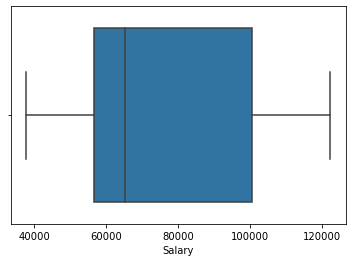

In [5]:
import seaborn as sns
sns.boxplot(data["Salary"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience'>

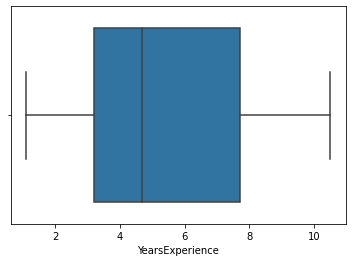

In [6]:
sns.boxplot(data["YearsExperience"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

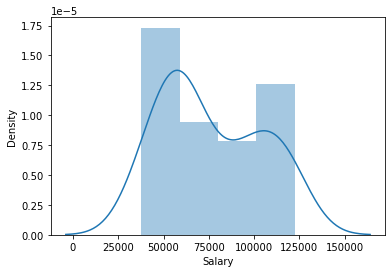

In [7]:
sns.distplot(data['Salary'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

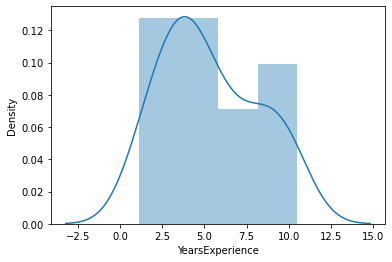

In [8]:
import seaborn as sns
sns.distplot(data['YearsExperience'])

Fitting a Linear Regression Model

In [10]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = data).fit()

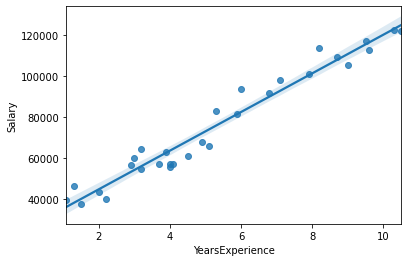

In [11]:
sns.regplot(x="YearsExperience", y="Salary", data=data);

In [12]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [13]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [14]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

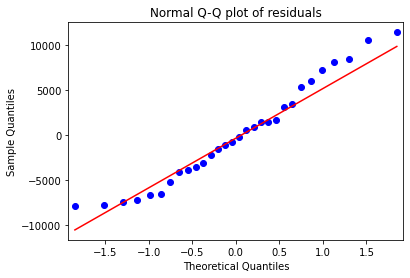

In [15]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [16]:
# By using Transformation.
df1= data[['YearsExperience']]
df1

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [17]:
# Sqrt transformation
out_array =np.sqrt(df1)
out_array

,YearsExperience
0,1.048809
1,1.140175
2,1.224745
3,1.414214
4,1.483240
5,1.702939
6,1.732051
7,1.788854
8,1.788854
9,1.923538


In [18]:
#log Transformation
trans= np.log10("df1")
trans

TypeError: ufunc 'log10' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [19]:
df2= data[['Salary']]
df2

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


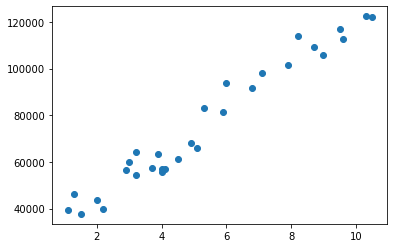

In [20]:
plt.scatter(df1,df2)

In [21]:
df3=pd.merge(out_array.reset_index(),df2.reset_index())
df3
df3.drop('index',axis=1)


,YearsExperience,Salary
0,1.048809,39343.0
1,1.140175,46205.0
2,1.224745,37731.0
3,1.414214,43525.0
4,1.483240,39891.0
5,1.702939,56642.0
6,1.732051,60150.0
7,1.788854,54445.0
8,1.788854,64445.0
9,1.923538,57189.0


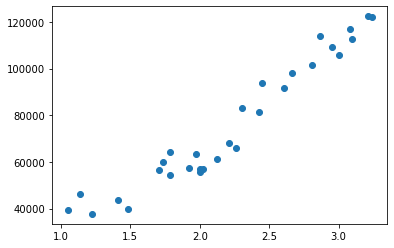

In [22]:
plt.scatter(out_array,df2)

In [23]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~out_array",data =df3).fit()

In [24]:
model.params

Intercept   -16055.769117
out_array    41500.680583
dtype: float64

In [25]:
print(model.tvalues, '\n', model.pvalues)    

Intercept    -3.262308
out_array    19.437148
dtype: float64 
 Intercept    2.906965e-03
out_array    8.565358e-18
dtype: float64


In [26]:
(model.rsquared,model.rsquared_adj)

(0.9310009544993526, 0.9285367028743294)

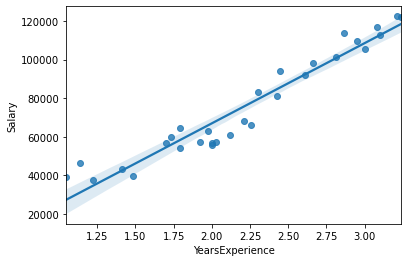

In [27]:
sns.regplot(x="YearsExperience", y="Salary", data =df3);

In [28]:
#Q.2
import pandas as pd
import numpy as np
data = pd.read_csv("Delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [29]:
data=data.rename({'Delivery Time':'DeliveryTime','Sorting Time':'SortingTime'},axis=1)

In [30]:
data.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [31]:
data.isna().sum()

DeliveryTime    0
SortingTime     0
dtype: int64

In [32]:
data.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

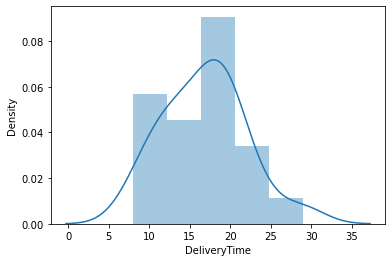

In [33]:
import seaborn as sns
sns.distplot(data['DeliveryTime'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

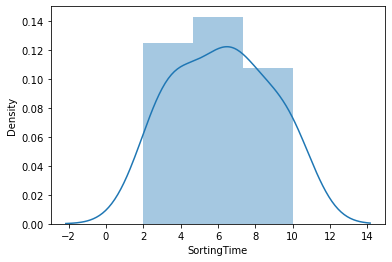

In [34]:
import seaborn as sns
sns.distplot(data['SortingTime'])

In [35]:
#Building a Linear Regression Model
import statsmodels.formula.api as smf
model = smf.ols('DeliveryTime~SortingTime',data = data).fit()

In [36]:
#Coefficients
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [37]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [38]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [39]:
#Sqrt Transformation
df1=data[['SortingTime']]
df1

,SortingTime
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [40]:
sortingtime=np.sqrt(df1)
sortingtime

,SortingTime
0,3.162278
1,2.000000
2,2.449490
3,3.000000
4,3.162278
5,2.449490
6,2.645751
7,1.732051
8,3.162278
9,3.000000


In [41]:
df2=data[['DeliveryTime']]
df2

,DeliveryTime
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [42]:
df3=pd.merge(sortingtime.reset_index(),df2.reset_index())
df3
df3.drop('index',axis=1)


,SortingTime,DeliveryTime
0,3.162278,21.00
1,2.000000,13.50
2,2.449490,19.75
3,3.000000,24.00
4,3.162278,29.00
5,2.449490,15.35
6,2.645751,19.00
7,1.732051,9.50
8,3.162278,17.90
9,3.000000,18.75


In [43]:
import statsmodels.formula.api as smf
model= smf.ols("DeliveryTime~sortingtime",data =df3).fit()

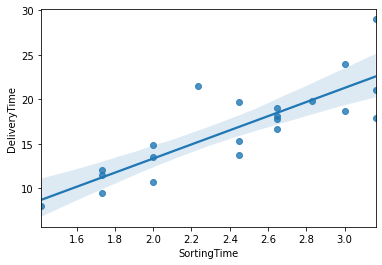

In [44]:
import seaborn as sns
sns.regplot(x="SortingTime", y="DeliveryTime", data=df3);

In [45]:
#Coefficients
model.params

Intercept     -2.518837
sortingtime    7.936591
dtype: float64

In [46]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept     -0.840911
sortingtime    6.592434
dtype: float64 
 Intercept      0.410857
sortingtime    0.000003
dtype: float64


In [47]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.695806227630867, 0.6797960290851232)

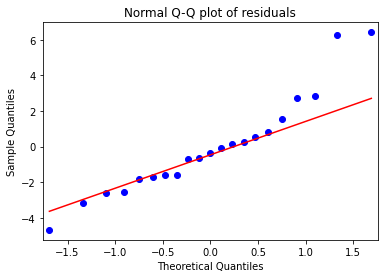

In [46]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()